In [ ]:
! git clone https://github.com/YomnaJehad/AI-for-Cyber-Security.git

Cloning into 'AI-for-Cyber-Security'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 1), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [ ]:
pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE,ADASYN,BorderlineSMOTE,SVMSMOTE

from tensorflow.keras.layers import Normalization
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import VotingClassifier , RandomForestClassifier

from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.pipeline import Pipeline

**function name**: evaluation_plots  
**function inputs**: the true labels, the predicted labels, the predictions proba    
**function purpose**: plotting the confusion matrix and the roc curve

In [ ]:
def evaluation_plots(y_true, y_pred, y_pred_prob):
  skplt.metrics.plot_confusion_matrix(y_true, y_pred, figsize=(5,5))
  fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:,0], pos_label =1)
  # plotting ROC curve
  plt.figure(figsize=(5, 5))
  plot_roc_curve(fpr, tpr)
  plt.show()

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)



---

# Dataset CIC DDoS 2019
[link](https://www.unb.ca/cic/datasets/ddos-2019.html)

---



In [ ]:
df = pd.read_csv('AI-for-Cyber-Security/Collected_dataset/collected.csv')
df.shape
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,0,42680.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.502024e+06,3.413690e+03,295.989583,500.959301,3596.0,1.0,28415.0,295.989583,500.959301,3596.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,444.536082,440.0,0.0,-97,0,0,0,0,0,0,97,42680,0,0,-1,-1,96,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,0,880.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,4.400000e+08,1.000000e+06,2.000000,0.000000,2.0,2.0,2.0,2.000000,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,660.000000,440.0,0.0,-2,0,0,0,0,0,0,2,880,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.812602e+06,4.119549e+03,243.964824,578.101371,5418.0,1.0,48549.0,243.964824,578.101371,5418.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200,0,0,0,0,0,0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.820552e+06,4.137617e+03,242.899497,485.292695,3337.0,1.0,48337.0,242.899497,485.292695,3337.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200,0,0,0,0,0,0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,2.747767e+06,6.244926e+03,160.934673,196.891271,1236.0,0.0,32026.0,160.934673,196.891271,1236.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200,0,0,0,0,0,0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6619,172.16.0.5-192.168.50.1-900-64792-17,172.16.0.5,900,192.168.50.1,64792,17,2018-12-01 11:32:35.878763,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,1.472000e+09,1.000000e+06,2.000000,0.000000,2.0,2.0,2.0,2.000000,0.000

# **Preprocessing**

Functions

In [ ]:
#Removing spaces from begining of columns names
def rem_spaces(data):
  cols = []
  for col in data.columns:
    cols.append(col.strip()) 
  data.columns = cols
  return data

#label encoding categorical features
def label_enc(X,y):
  cols = X.columns
  num_cols = X._get_numeric_data().columns
  cat_cols = list(set(cols) - set(num_cols))

  le = LabelEncoder()
  for i in cat_cols:
    X[i] = le.fit_transform(X[i])

  #Label encoding target variable
  le = LabelEncoder()
  y = le.fit_transform(y)
  return X,y

#Scaling
def scale(data):
  scaler = StandardScaler()
  data_scaled = scaler.fit_transform(data)
  data = pd.DataFrame(data_scaled, columns= data.columns)
  return data

#Remove infinity and na values from the dataset
def rem_inf_na(data):
  data = data.replace([np.inf, -np.inf], np.nan)        #Replace inf with na
  data = data.fillna(data.mean())                       #Replace na with mean
  return data

#Feauture selection
def feat_sel(k,X,y):

  bestfeatures = SelectKBest(score_func=mutual_info_classif, k=k)
  fit = bestfeatures.fit(X, y)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)
  #concat two dataframes for better visualization 
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']  #naming the dataframe columns
  #print(featureScores.nlargest(k,'Score'))  #print 10 best features
  X_filtered = pd.DataFrame(X, columns = featureScores.nlargest(k,'Score')["Specs"])
  return X_filtered


#SMOTE
def smote_samp(X,y):
  smote = SMOTE()
  X_smote, y_smote = smote.fit_resample(X, y)
  print(Counter(y_smote))
  return(X_smote, y_smote)

In [ ]:
#Clean data
df = rem_spaces(df)

y = df['Label']
X = df.drop(columns = 'Label')
X

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,0,42680.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.502024e+06,3.413690e+03,295.989583,500.959301,3596.0,1.0,28415.0,295.989583,500.959301,3596.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,440.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,444.536082,440.0,0.0,-97,0,0,0,0,0,0,97,42680,0,0,-1,-1,96,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,0,880.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,4.400000e+08,1.000000e+06,2.000000,0.000000,2.0,2.0,2.0,2.000000,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,440.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,660.000000,440.0,0.0,-2,0,0,0,0,0,0,2,880,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.812602e+06,4.119549e+03,243.964824,578.101371,5418.0,1.0,48549.0,243.964824,578.101371,5418.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,440.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200,0,0,0,0,0,0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.820552e+06,4.137617e+03,242.899497,485.292695,3337.0,1.0,48337.0,242.899497,485.292695,3337.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,440.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200,0,0,0,0,0,0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,2.747767e+06,6.244926e+03,160.934673,196.891271,1236.0,0.0,32026.0,160.934673,196.891271,1236.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,440.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200,0,0,0,0,0,0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6619,172.16.0.5-192.168.50.1-900-64792-17,172.16.0.5,900,192.168.50.1,64792,17,2018-12-01 11:32:35.878763,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,1.472000e+09,1.000000e+06,2.000000,0.000000,2.0,2.0,2.0,2.000000,0.000000,2.0

In [ ]:
#y.value_counts()
Counter(y)

Counter({'BENIGN': 8879,
         'DrDoS_DNS': 9120,
         'DrDoS_LDAP': 9998,
         'DrDoS_MSSQL': 9999,
         'DrDoS_NTP': 2004,
         'DrDoS_UDP': 10000})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

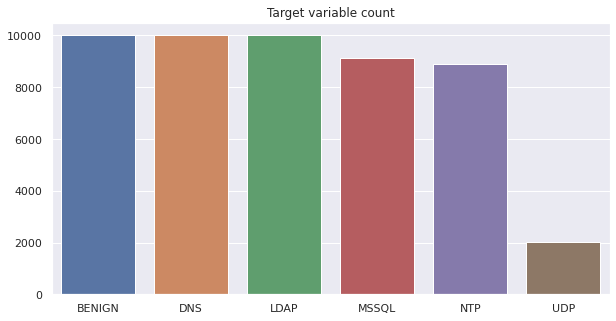

In [ ]:
# check for data imbalance
x = y.value_counts().values
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(['BENIGN','DNS','LDAP','MSSQL','NTP','UDP'],x)
plt.title('Target variable count')

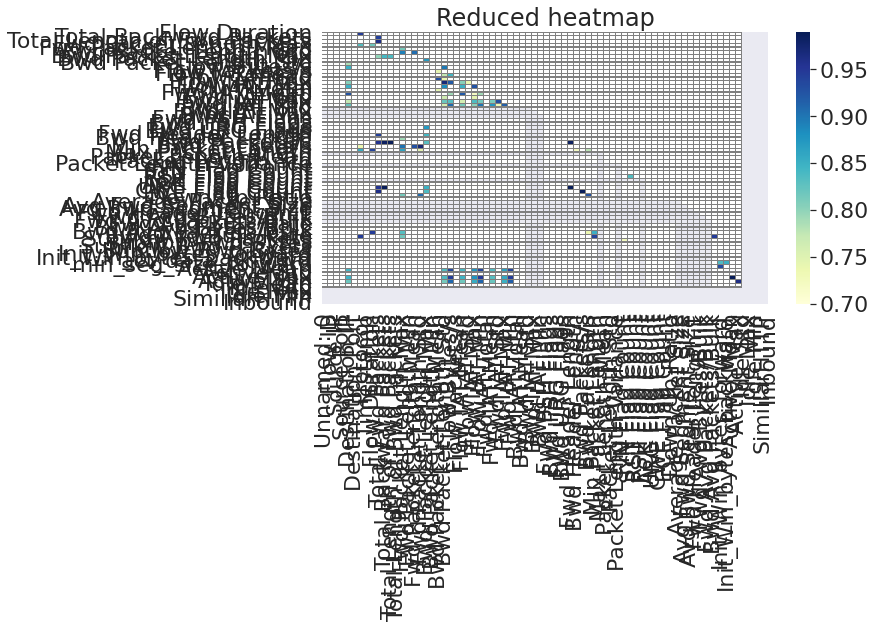

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy


labels = list(X.columns)
corr = X.corr()

#conditions for filtering 0.6<=r<=0.9
val_min = 0.7
val_max = 0.99

#plotting starts here
sns.set(font_scale=2)

#define the colormap with clipping values
my_cmap = copy(plt.cm.YlGnBu)
my_cmap.set_over("white")
my_cmap.set_under("white")

corr = np.tril(corr)

#delete columns where all elements do not fulfill the conditions
ind_x,  = np.where(np.all(np.logical_or(corr<val_min, corr>val_max), axis=0))
corr = np.delete(corr, ind_x, 1)
#update x labels
map_labels_x = [item for i, item in enumerate(labels) if i not in ind_x]
    
#now the same for rows 
ind_y, = np.where(np.all(np.logical_or(corr<val_min, corr>val_max), axis=1))
corr = np.delete(corr, ind_y, 0)
#update y labels
map_labels_y = [item for i, item in enumerate(labels) if i not in ind_y]

#plot heatmap
g2 = sns.heatmap(corr,
    xticklabels=map_labels_x,
    yticklabels=map_labels_y,
    vmin=val_min,
    vmax=val_max,
    cmap=my_cmap,
    linewidths=0.2,
    linecolor="grey"
     
                ) #, ax=ax2)

g2.set_title("Reduced heatmap")
sns.set(rc={'figure.figsize':(200,100)})
plt.show()


In [ ]:
#drop columns which contains only 1 value for all records (0)
for i in X.columns:
  if len(X[i].unique()) == 1:
    X = X.drop(i, axis =1)


#Drop other unimportant columns
X = X.drop('Unnamed: 0',axis=1)
X = X.drop("Flow ID",axis=1)
X = X.drop("Timestamp",axis=1)
X = X.drop("SimillarHTTP",axis=1)
X = X.drop("Protocol",axis=1)

In [ ]:
#label encoding categorical features
X, y = label_enc(X,y)
#Remove nan, inf values
X = rem_inf_na(X)
#scaling data
X = scale(X)

X

,Source IP,Source Port,Destination IP,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,SYN Flag Count,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,-0.456509,-0.784081,-0.205135,1.499739,-0.150580,0.138881,-0.071804,1.096171,-0.028552,-0.598977,-0.509677,-0.549417,-0.226967,-0.107821,-0.2187,-0.179663,-0.148277,-0.838716,-0.948575,-0.105535,-0.146542,-0.144646,-0.022041,-0.144756,-0.117853,-0.137113,-0.136952,-0.021012,-0.133229,-0.114116,-0.1217,-0.122728,-0.171356,-0.144019,0.12304,0.004467,-0.930234,-0.048296,-0.509265,-0.428187,-0.567426,-0.188949,-0.044913,-0.031639,-0.144019,-0.231293,-0.334924,-0.279417,-0.364517,-0.729542,-0.549417,-0.179663,0.12304,0.138881,1.096171,-0.071804,-0.028552,-0.222624,-0.153103,1.108217,0.216009,-0.061442,-0.037857,-0.055629,-0.05339,-0.120419,-0.045203,-0.121385,-0.116794,0.450483
1,1.592532,-0.784081,-2.371450,1.499739,-0.152615,-0.060861,-0.071804,-0.422212,-0.028552,-0.598977,-0.509677,-0.549417,-0.226967,-0.107821,-0.2187,-0.179663,-0.148277,-0.480044,0.158046,-0.105905,-0.146890,-0.145210,-0.022040,-0.146798,-0.118154,-0.137385,-0.137518,-0.021010,-0.133229,-0.114116,-0.1217,-0.122728,-0.171356,-0.144019,0.12304,0.004467,0.170716,-0.048296,-0.509265,-0.428187,-0.567426,-0.188949,-0.044913,-0.031639,-0.144019,-0.231293,-0.334924,-0.279417,-0.364517,-0.500765,-0.549417,-0.179663,0.12304,-0.060861,-0.422212,-0.071804,-0.028552,-0.222624,-0.153103,-0.396257,0.216009,-0.061442,-0.037857,-0.055629,-0.05339,-0.120419,-0.045203,-0.121385,-0.116794,-2.219838
2,-0.456509,-0.784081,-0.205135,0.844939,-0.149139,0.355444,-0.071804,2.742417,-0.028552,-0.598977,-0.509677,-0.549417,-0.226967,-0.107821,-0.2187,-0.179663,-0.148277,-0.838462,-0.947791,-0.105601,-0.146488,-0.144361,-0.022041,-0.143309,-0.117906,-0.137072,-0.136665,-0.021012,-0.133229,-0.114116,-0.1217,-0.122728,-0.171356,-0.144019,0.12304,0.004467,-0.929454,-0.048296,-0.509265,-0.428187,-0.567426,-0.188949,-0.044913,-0.031639,-0.144019,-0.231293,-0.334924,-0.279417,-0.364517,-0.732022,-0.549417,-0.179663,0.12304,0.355444,2.742417,-0.071804,-0.028552,-0.222624,-0.153103,2.739383,0.216009,-0.061442,-0.037857,-0.055629,-0.05339,-0.120419,-0.045203,-0.121385,-0.116794,0.450483
3,-0.456509,-0.784081,-0.205135,-0.756639,-0.149154,0.355444,-0.071804,2.742417,-0.028552,-0.598977,-0.509677,-0.549417,-0.226967,-0.107821,-0.2187,-0.179663,-0.148277,-0.838456,-0.947771,-0.105602,-0.146553,-0.144687,-0.022041,-0.143324,-0.117907,-0.137122,-0.136993,-0.021012,-0.133229,-0.114116,-0.1217,-0.122728,-0.171356,-0.144019,0.12304,0.004467,-0.929434,-0.048296,-0.509265,-0.428187,-0.567426,-0.188949,-0.044913,-0.031639,-0.144019,-0.231293,-0.334924,-0.279417,-0.364517,-0.732022,-0.549417,-0.179663,0.12304,0.355444,2.742417,-0.071804,-0.028552,-0.222624,-0.153103,2.739383,0.216009,-0.061442,-0.037857,-0.055629,-0.05339,-0.120419,-0.045203,-0.121385,-0.116794,0.450483
4,-0.456509,-0.784081,-0.205135,-0.014557,-0.150322,0.355444,-0.071804,2.742417,-0.028552,-0.598977,-0.509677,-0.

In [ ]:
#Feauture selection #1 (k best)
X_filtered = feat_sel(40,X,y)
#smote
x_smote, y_smote = smote_samp(X_filtered,y)

Counter({1: 10000, 0: 10000, 2: 10000, 5: 10000, 4: 10000, 3: 10000})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

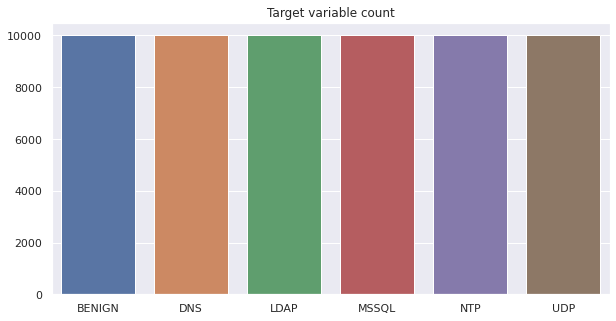

In [ ]:
# check for data imbalance
x = pd.DataFrame(y_smote).value_counts().values
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(['BENIGN','DNS','LDAP','MSSQL','NTP','UDP'],x)
plt.title('Target variable count')

In [ ]:
X_filtered = x_smote
y = y_smote

# **Model**

In [ ]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
#SVM
clf_svc = SVC(probability=True,kernel='poly',degree=3)
clf_svc.fit(X_train, y_train)
pred_svc = clf_svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       0.98      0.82      0.90      2000
           2       0.71      0.08      0.15      2000
           3       0.49      0.96      0.65      2000
           4       0.96      0.99      0.98      2000
           5       0.95      1.00      0.98      2000

    accuracy                           0.81     12000
   macro avg       0.85      0.81      0.77     12000
weighted avg       0.85      0.81      0.77     12000



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(max_depth=10, random_state=0,n_estimators=100)
random.fit(X_train, y_train)
pred_random = random.predict(X_test)
print(classification_report(y_test, pred_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       0.99      0.87      0.92      2000
           2       0.83      0.92      0.87      2000
           3       0.83      0.81      0.82      2000
           4       0.96      1.00      0.98      2000
           5       1.00      1.00      1.00      2000

    accuracy                           0.93     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.93      0.93      0.93     12000



In [ ]:
scores = cross_val_score(random, X_filtered, y, cv=5)
scores

array([0.94491667, 0.94416667, 0.93166667, 0.92283333, 0.92108333])

## Ensemble approach

**1. First line of defense**

In [ ]:
Binary_ATTACK_OR_NOT = []
for label in y:
  if label == 0:
    Binary_ATTACK_OR_NOT.append(0)
  else:
    Binary_ATTACK_OR_NOT.append(1)

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, Binary_ATTACK_OR_NOT, test_size=0.2, random_state=42,stratify=Binary_ATTACK_OR_NOT)

In [ ]:
#SVM
attack_or_not_model = SVC()
attack_or_not_model.fit(X_train, y_train)
pred_attack_or_not_model = attack_or_not_model.predict(X_test)
print(classification_report(y_test, pred_attack_or_not_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



**2. Classify which type of attack**

In [ ]:
MultiClass_ATTACK_TYPE = []
X_ATTACK_TYPE = pd.DataFrame()
for i in range(0,len(y)):
  if y[i] not in [0]:
    X_ATTACK_TYPE = X_ATTACK_TYPE.append(X_filtered.iloc[[i]])
    MultiClass_ATTACK_TYPE.append(y[i])

In [ ]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ATTACK_TYPE, MultiClass_ATTACK_TYPE, test_size=0.2, stratify=MultiClass_ATTACK_TYPE)

In [ ]:
#Random Forest
attacks_multiclass_model_rf = RandomForestClassifier(max_depth=12)
attacks_multiclass_model_rf.fit(X_train, y_train)
pred_attacks_multiclass = attacks_multiclass_model_rf.predict(X_test)
classificationReport=classification_report(y_test, pred_attacks_multiclass)
print(classificationReport)

              precision    recall  f1-score   support

           1       0.99      0.93      0.96      2000
           2       0.83      0.90      0.86      2000
           3       0.86      0.81      0.83      2000
           4       0.97      1.00      0.98      2000
           5       1.00      1.00      1.00      2000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



str

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

maxDepth= list(range(1,15))

accuracy = []
f1score = []

for i in maxDepth:
  attacks_multiclass_model_rf = RandomForestClassifier(max_depth=i)
  attacks_multiclass_model_rf.fit(X_train, y_train)
  pred_attacks_multiclass = attacks_multiclass_model_rf.predict(X_test)
  accuracy.append(accuracy_score(y_test, pred_attacks_multiclass))
  f1score.append(f1_score(y_test, pred_attacks_multiclass,average='micro'))

In [ ]:
def plot_model_feature_performance(title,x,y,xlabel,ylabel):
  plt.plot(x,y,marker='o',label='Workpiece')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title("Decision Tree performance using "+ylabel)
  plt.legend()
  plt.show()

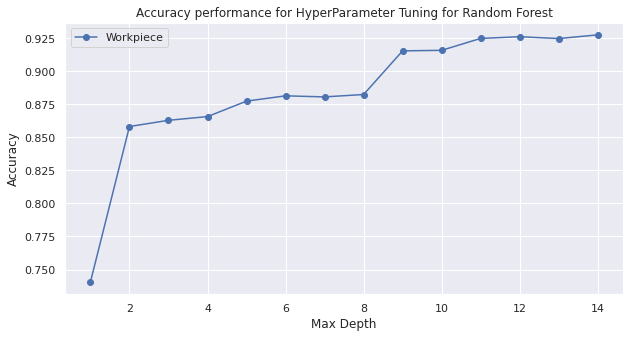

In [ ]:
plot_model_feature_performance("HyperParameter Tuning for Random Forest",maxDepth,accuracy,'Max Depth')

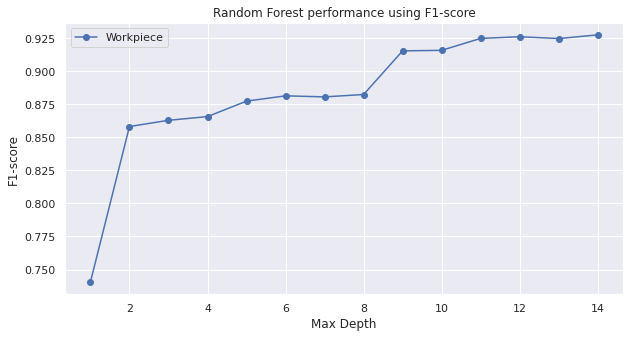

In [ ]:
plot_model_feature_performance("HyperParameter Tuning for Random Forest",maxDepth,f1score,'Max Depth','F1-score')

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

estimators= [50,100,150,200,250,300,350,400]

accuracy = []
f1score = []

for i in estimators:
  attacks_multiclass_model_rf = RandomForestClassifier(max_depth=12,n_estimators=i)
  attacks_multiclass_model_rf.fit(X_train, y_train)
  pred_attacks_multiclass = attacks_multiclass_model_rf.predict(X_test)
  accuracy.append(accuracy_score(y_test, pred_attacks_multiclass))
  f1score.append(f1_score(y_test, pred_attacks_multiclass,average='micro'))

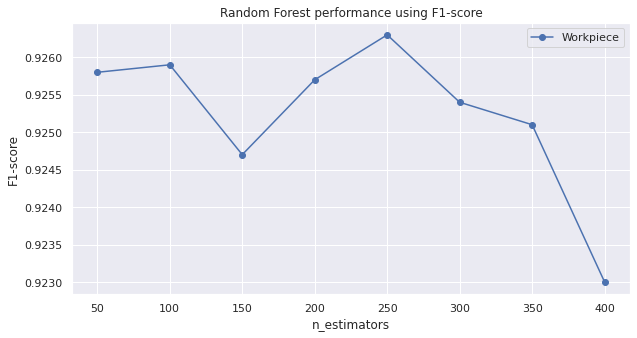

In [ ]:
plot_model_feature_performance("HyperParameter Tuning for Random Forest",estimators,f1score,'n_estimators','F1-score')

**3. Binary Classification of two attacks**

In [ ]:
Binary_ATTACK_TYPE = []
X_ATTACK_TYPE = pd.DataFrame()
for i in range(0,len(y)):
  if y[i] not in [0,1,4,5]:
    X_ATTACK_TYPE = X_ATTACK_TYPE.append(X_filtered.iloc[[i]])
    Binary_ATTACK_TYPE.append(y[i])

In [ ]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ATTACK_TYPE, Binary_ATTACK_TYPE, test_size=0.2, stratify=Binary_ATTACK_TYPE)

In [ ]:
#Decision Tree
binary_attacks_model_dt = DecisionTreeClassifier(max_depth=9)
binary_attacks_model_dt.fit(X_train, y_train)
pred_binary_attacks_model = binary_attacks_model_dt.predict(X_test)
print(classification_report(y_test, pred_binary_attacks_model))

              precision    recall  f1-score   support

           2       0.84      0.92      0.88      2000
           3       0.91      0.82      0.87      2000

    accuracy                           0.87      4000
   macro avg       0.88      0.87      0.87      4000
weighted avg       0.88      0.87      0.87      4000



In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

maxDepth= list(range(1,15))

accuracy = []
f1score = []

for i in maxDepth:
  binary_attacks_model_dt = DecisionTreeClassifier(max_depth=i)
  binary_attacks_model_dt.fit(X_train, y_train)
  pred_binary_attacks_model = binary_attacks_model_dt.predict(X_test)
  accuracy.append(accuracy_score(y_test, pred_binary_attacks_model))
  f1score.append(f1_score(y_test, pred_binary_attacks_model,average='micro'))

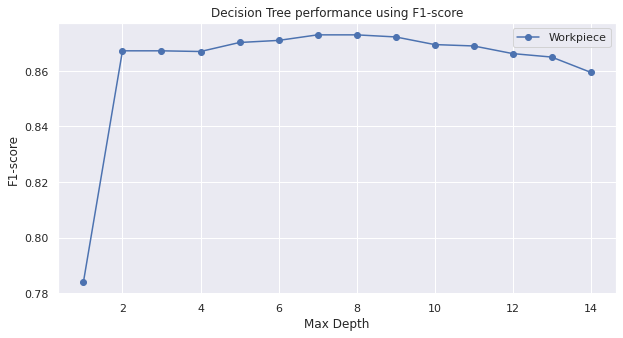

In [ ]:
plot_model_feature_performance("HyperParameter Tuning for Decision tree",maxDepth,f1score,'Max Depth','F1-score')

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

max_features= list(range(1,40))

accuracy = []
f1score = []

for i in max_features:
  binary_attacks_model_dt = DecisionTreeClassifier(max_depth=9,max_features=i)
  binary_attacks_model_dt.fit(X_train, y_train)
  pred_binary_attacks_model = binary_attacks_model_dt.predict(X_test)
  accuracy.append(accuracy_score(y_test, pred_binary_attacks_model))
  f1score.append(f1_score(y_test, pred_binary_attacks_model,average='micro'))

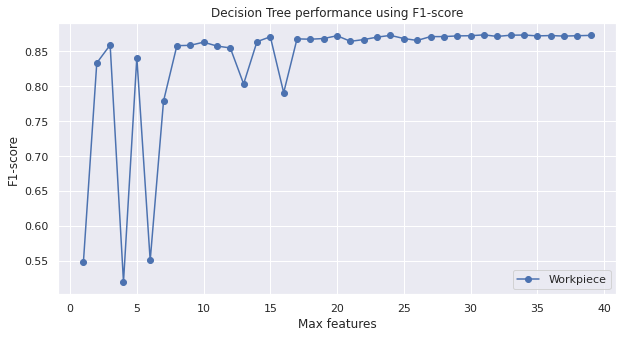

In [ ]:
plot_model_feature_performance("HyperParameter Tuning for Decision tree",max_features,f1score,'Max features','F1-score')

In [ ]:
accuracy

[0.5485,
 0.833,
 0.85875,
 0.5195,
 0.84075,
 0.55025,
 0.7785,
 0.85775,
 0.85825,
 0.86275,
 0.85725,
 0.8545,
 0.803,
 0.8635,
 0.8705,
 0.7905,
 0.8675,
 0.867,
 0.868,
 0.872,
 0.864,
 0.8665,
 0.87,
 0.8725,
 0.868,
 0.86525,
 0.87075,
 0.87075,
 0.87175,
 0.872,
 0.87325,
 0.871,
 0.87275,
 0.873,
 0.87175,
 0.87225,
 0.8715,
 0.872,
 0.8725]

Combination of the 3 steps

In [ ]:
def ensemble_predict(x_test,attack_or_begnin_model,multiclass_attacks_model,binary_attacks_model):
  predictions = []
  for i in range(0,len(x_test)):
    # Decision Tree :
    binary_predict = attack_or_begnin_model.predict(x_test.iloc[[i]])[0]
    if binary_predict  == 1:
      attacks_predictions = multiclass_attacks_model.predict(x_test.iloc[[i]])[0]
      if attacks_predictions in [1,4,5]:
        predictions.append(attacks_predictions)
      else:
        binary_attacks = binary_attacks_model.predict(x_test.iloc[[i]])[0]
        predictions.append(binary_attacks)
    else:
      predictions.append(binary_predict)
  return predictions

In [ ]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
predictions = ensemble_predict(X_test,attack_or_not_model,attacks_multiclass_model_rf,binary_attacks_model_dt)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       0.99      0.92      0.95      2000
           2       0.84      0.93      0.88      2000
           3       0.87      0.82      0.84      2000
           4       0.98      1.00      0.99      2000
           5       1.00      1.00      1.00      2000

    accuracy                           0.94     12000
   macro avg       0.95      0.94      0.94     12000
weighted avg       0.95      0.94      0.94     12000



# k-Fold Cross Validation

In [ ]:
from random import seed
from random import randrange

# Split a dataset into k folds
def cross_validation_split(dataset, folds=5):
  dataset_split = list()
  fold_size = int(len(dataset) / folds)
  for i in range(folds):
    fold = list()
    while len(fold) < fold_size:
      index = randrange(len(dataset))
      fold.append(dataset.iloc[index])
    dataset_split.append(fold)
  return dataset_split

dataset = X_filtered
dataset['Label'] = y
folds = cross_validation_split(dataset, 10)

for i in range(len(folds)): 
  fold_test = folds[i]
  fold_train = [item for item in folds if item is not folds[i]]
  test_cv = pd.DataFrame(fold_test)
  train_cv = pd.DataFrame()
  
  for j in range(len(fold_train)): #concatenate 4 folds for training
    train_cv = train_cv.append(pd.DataFrame(fold_train[j]))
  train_cv

  #train
  attack_or_not_model.fit(train_cv.iloc[:,:-1],train_cv.iloc[:,-1])
  attacks_multiclass_model_rf.fit(train_cv.iloc[:,:-1], train_cv.iloc[:,-1])
  binary_attacks_model_dt.fit(train_cv.iloc[:,:-1], train_cv.iloc[:,-1])

  #predict
  predictions = ensemble_predict(test_cv.iloc[:,:-1],attack_or_not_model,attacks_multiclass_model_rf,binary_attacks_model_dt)

  print("fold ", i)
  print(classification_report(test_cv.iloc[:,-1], predictions))
  print("\n")

fold  0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       971
         1.0       1.00      0.88      0.94      1009
         2.0       0.51      0.68      0.58       997
         3.0       0.48      0.36      0.41       996
         4.0       0.96      1.00      0.98      1019
         5.0       1.00      1.00      1.00      1008

    accuracy                           0.82      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.82      0.82      0.82      6000



fold  1
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1004
         1.0       1.00      0.87      0.93       953
         2.0       0.54      0.41      0.47      1071
         3.0       0.45      0.61      0.52       939
         4.0       0.97      1.00      0.98      1015
         5.0       0.99      1.00      1.00      1018

    accuracy                           0.81      6000
   ma